The results in this notebook are the same with teh Result_Final v3 however, here we are adding scaling in our pipeline in order to see differences

In [1]:
#import libraries part 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import random
warnings.filterwarnings('ignore')
%matplotlib inline

## Data import and decription

In [2]:
df1 = pd.read_csv("Dataset v1.csv")
heldout=pd.read_csv("heldout.csv")
df2= pd.read_csv("Dataset v2.csv")
df3= pd.read_csv("Dataset v3.csv")
df4= pd.read_csv("Dataset v4.csv")
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import KFold


# define a quick function for mean relative absolute error
def mean_relative_absolute_error(y_true, y_pred):
    x=sum(np.abs((y_true - y_pred)) / y_true ) /len(y_true)
    return x

#### Dataset v3

Contains simulated correlated and non correlated surfaces with specific ranges of rms, Sk, Ku and the target value Active Area

In [4]:
df33=df3[['Rms','clx','cly','Skewness','Kurtosis','Area']]

In [5]:
df3[['Rms','clx','cly','Skewness','Kurtosis','Area']].sample(5)

,Rms,clx,cly,Skewness,Kurtosis,Area
1724,0.013093,0.234200,0.106710,-0.41792,2.4305,65.887
733,0.037764,0.340330,0.086521,0.87913,4.9168,78.563
1197,0.020847,0.069078,0.148050,0.45959,1.8614,72.773
1080,0.043998,0.182130,0.181940,0.99973,6.4347,75.180
909,0.035667,0.130880,0.263970,-1.92730,5.8302,72.782


In [6]:
df33.drop([2891],inplace=True)

y1=df33['Area']
X1=df33[['Rms','clx','cly','Skewness','Kurtosis']]

In [7]:
df33.describe()

,Rms,clx,cly,Skewness,Kurtosis,Area
count,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000
mean,0.031818,0.215624,0.214187,0.024124,5.513888,72.456063
std,0.016403,0.088406,0.088364,1.137891,2.306104,8.739961
min,0.004013,0.054494,0.049875,-2.747300,1.497900,64.035000
25%,0.017517,0.139360,0.138540,-0.824070,3.565300,65.887000
50%,0.031769,0.216820,0.213680,0.025149,5.470800,69.877000
75%,0.046358,0.289080,0.287300,0.844740,7.536100,75.456000
max,0.060049,0.465580,0.435600,2.724300,9.560700,117.950000


#### Dataset v4

Contains simulated correlated and non correlated surfaces with specific ranges of rms, Sk, Ku and the target value Active Area. 

Compared to the v3, this dataset contains more instances and differnt distinct combinations of values that we would like to test.

In [8]:
y1_held=heldout['Area']
X1_held=heldout[['Rms','clx','cly','Skewness','Kurtosis']]

In [9]:
heldout[['Rms','clx','cly','Skewness','Kurtosis','Area']].describe()

,Rms,clx,cly,Skewness,Kurtosis,Area
count,15288.000000,15288.000000,15288.000000,15288.000000,15288.000000,15288.000000
mean,0.029002,0.210099,0.210005,-0.081806,5.382781,73.232645
std,0.017080,0.100984,0.101117,1.130900,1.975513,10.775388
min,0.003973,0.046519,0.046790,-2.369700,1.488700,64.026000
25%,0.014001,0.115830,0.115950,-0.949343,3.508200,65.359000
50%,0.028975,0.211295,0.210665,-0.054045,5.504200,69.253500
75%,0.044004,0.294695,0.294980,0.798845,7.464000,76.840250
max,0.054360,0.474560,0.500690,2.166300,7.614100,131.250000


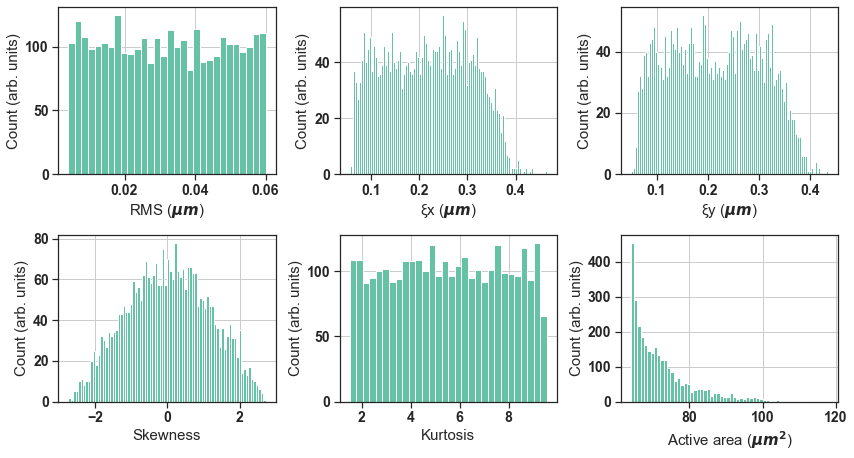

In [10]:
f = plt.figure(figsize=(12,9))
font = {'family' : 'normal',
       'weight' : 'bold',
       'size'   : 40}

plt.rc('font', **font)
sns.set(style="ticks", palette="Set2" )
ax = f.add_subplot(331 )
ax = df33['Rms'].hist(bins=30)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('RMS ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('RMS',fontsize=10)

ax2 = f.add_subplot(332)

ax2 =  df33['clx'].hist(bins=100)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('ξx ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax3 = f.add_subplot(333)

ax3 =  df33['cly'].hist(bins=100)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('ξy ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax4 = f.add_subplot(334)


ax4 =  df33['Skewness'].hist(bins=80)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Skewness',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax5 = f.add_subplot(335)

ax5 =  df33['Kurtosis'].hist(bins=30)

plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Kurtosis',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax6 = f.add_subplot(336)

ax6 =  df33['Area'].hist(bins=60)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Active area ($μm^2$)',fontsize=15)


#plt.title('Linear regression (Train size= 610)',fontsize=10)
f.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=14)

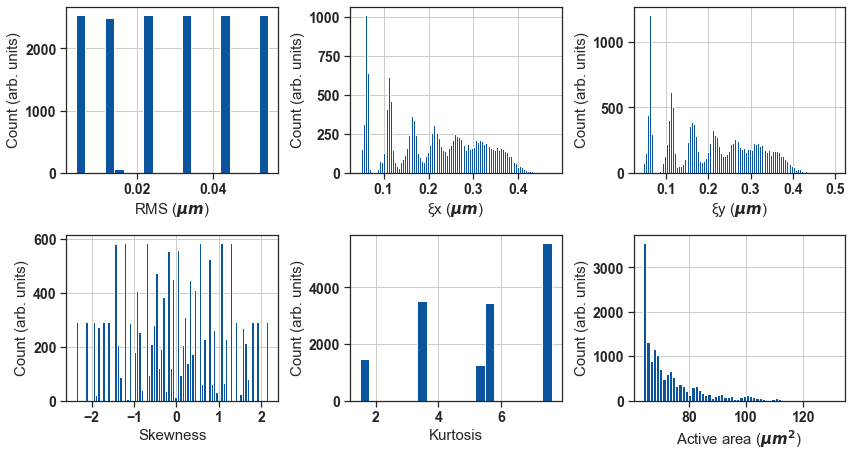

In [11]:
f = plt.figure(figsize=(12,9))
font = {'family' : 'normal',
       'weight' : 'bold',
       'size'   : 27}

plt.rc('font', **font)
sns.set(style="ticks", palette="Blues_r" )
ax = f.add_subplot(331 )
ax = heldout['Rms'].hist(bins=20)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('RMS ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('RMS',fontsize=10)

ax2 = f.add_subplot(332)

ax2 =  heldout['clx'].hist(bins=100)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('ξx ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax3 = f.add_subplot(333)

ax3 =  heldout['cly'].hist(bins=100)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('ξy ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax4 = f.add_subplot(334)


ax4 =  heldout['Skewness'].hist(bins=80)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Skewness',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax5 = f.add_subplot(335)

ax5 =  heldout['Kurtosis'].hist(bins=20)

plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Kurtosis',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax6 = f.add_subplot(336)

ax6 =  heldout['Area'].hist(bins=60)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Active area ($μm^2$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
#plt.rc('xtick', labelsize=35) 
#plt.rc('ytick', labelsize=35) 
f.tight_layout()
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=15)
#plt.rcParams['xtick.major.size'] = 20
#plt.rcParams['xtick.major.width'] = 5
#plt.rcParams['ytick.minor.size'] = 20
#plt.rcParams['ytick.minor.width'] = 5

#### Lets scale the data

In [12]:
# feature scaling
from sklearn.preprocessing import StandardScaler

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
ctrain_vars = X1.columns

# create scaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
#  fit  the scaler to the train set
scaler.fit(X1[ctrain_vars]) 

# transform the train and test set
X1[ctrain_vars] = scaler.transform(X1[ctrain_vars])
df33[ctrain_vars] = scaler.transform(df33[ctrain_vars])
heldout[ctrain_vars] = scaler.transform(heldout[ctrain_vars])

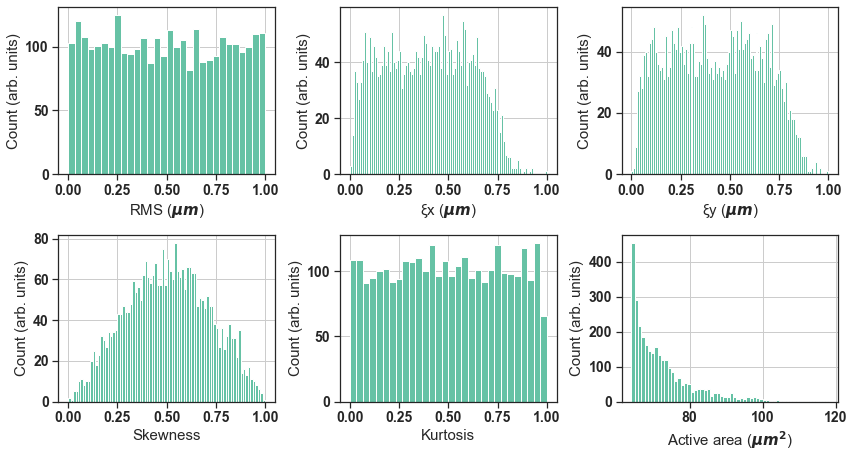

In [34]:
f = plt.figure(figsize=(12,9))
font = {'family' : 'normal',
       'weight' : 'bold',
       'size'   : 40}

plt.rc('font', **font)
sns.set(style="ticks", palette="Set2" )
ax = f.add_subplot(331 )
ax = df33['Rms'].hist(bins=30)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('RMS ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('RMS',fontsize=10)

ax2 = f.add_subplot(332)

ax2 =  df33['clx'].hist(bins=100)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('ξx ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax3 = f.add_subplot(333)

ax3 =  df33['cly'].hist(bins=100)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('ξy ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax4 = f.add_subplot(334)


ax4 =  df33['Skewness'].hist(bins=80)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Skewness',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax5 = f.add_subplot(335)

ax5 =  df33['Kurtosis'].hist(bins=30)

plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Kurtosis',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax6 = f.add_subplot(336)

ax6 =  df33['Area'].hist(bins=60)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Active area ($μm^2$)',fontsize=15)


#plt.title('Linear regression (Train size= 610)',fontsize=10)
f.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=14)

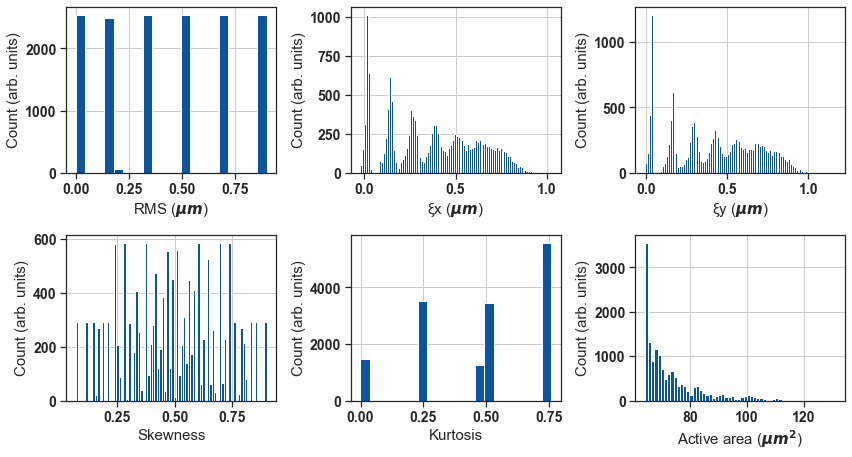

In [35]:
f = plt.figure(figsize=(12,9))
font = {'family' : 'normal',
       'weight' : 'bold',
       'size'   : 27}

plt.rc('font', **font)
sns.set(style="ticks", palette="Blues_r" )
ax = f.add_subplot(331 )
ax = heldout['Rms'].hist(bins=20)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('RMS ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('RMS',fontsize=10)

ax2 = f.add_subplot(332)

ax2 =  heldout['clx'].hist(bins=100)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('ξx ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax3 = f.add_subplot(333)

ax3 =  heldout['cly'].hist(bins=100)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('ξy ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax4 = f.add_subplot(334)


ax4 =  heldout['Skewness'].hist(bins=80)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Skewness',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax5 = f.add_subplot(335)

ax5 =  heldout['Kurtosis'].hist(bins=20)

plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Kurtosis',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax6 = f.add_subplot(336)

ax6 =  heldout['Area'].hist(bins=60)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Active area ($μm^2$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
#plt.rc('xtick', labelsize=35) 
#plt.rc('ytick', labelsize=35) 
f.tight_layout()
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=15)
#plt.rcParams['xtick.major.size'] = 20
#plt.rcParams['xtick.major.width'] = 5
#plt.rcParams['ytick.minor.size'] = 20
#plt.rcParams['ytick.minor.width'] = 5

## Modeling
## Linear Regression

In [36]:
from sklearn import linear_model
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in range(80,81,1):
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        regr = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
        regr.fit(X_train, y_train)
        pre= regr.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_new5 = pd.DataFrame(lst2, columns=cols)
df_new5


80


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,80,610,23.057625,3.830197,0.137959,0.03906,0.421318,0.090101


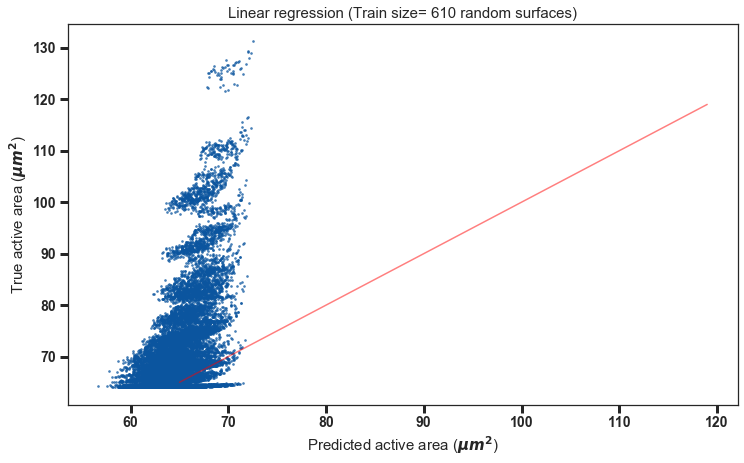

In [37]:
plt.figure(figsize=(12,7))
plt.scatter(pre,y1_held,alpha=0.6,s=3)
x = np.arange(65, 120)
plt.plot(x,x,'r',alpha=0.5)
plt.ylabel('True active area ($μm^2$)',fontsize=15)
plt.xlabel('Predicted active area ($μm^2$)',fontsize=15)
plt.title('Linear regression (Train size= 610 random surfaces)',fontsize=15)
plt.tick_params(direction='out', length=8, width=3,
                grid_alpha=0.5,labelsize=14)
plt.show()

In [38]:
from sklearn import linear_model
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in range(90,99,1):
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        regr = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
        regr.fit(X_train, y_train)
        pre= regr.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_new5 = pd.DataFrame(lst2, columns=cols)
df_new5

90
91
92
93
94
95
96
97
98


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,90,305,23.633193,4.442943,0.143950,0.043472,0.385460,0.088575
1,91,274,23.561583,6.320056,0.145008,0.058969,0.391405,0.118186
2,92,244,24.738346,4.779164,0.154735,0.048000,0.376832,0.090499
3,93,213,24.874034,5.658001,0.157325,0.053938,0.357112,0.099295
4,94,183,24.348407,5.386276,0.153722,0.050654,0.390882,0.112810
5,95,152,23.869241,6.046012,0.149549,0.056393,0.375908,0.105648
6,96,122,23.932006,8.565888,0.150810,0.079145,0.337100,0.120156
7,97,91,22.650608,4.369610,0.138272,0.039573,0.365349,0.096911
8,98,61,23.810040,6.896207,0.154559,0.062596,0.335521,0.110990


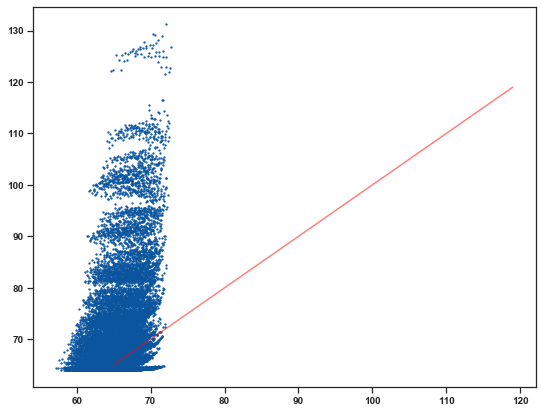

In [39]:
plt.figure(figsize=(9,7))
plt.scatter(pre,y1_held,alpha=0.8,s=2)
x = np.arange(65, 120)
plt.plot(x,x,'r',alpha=0.5)
plt.show()

In [40]:
from sklearn import linear_model
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in [30,40,50,60,70,80,90,92,94,96,98,99]:
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        regr = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
        regr.fit(X_train, y_train)
        pre= regr.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_reg1 = pd.DataFrame(lst2, columns=cols)
df_reg1

30
40
50
60
70
80
90
92
94
96
98
99


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,30,2137,22.642016,1.153844,0.133654,0.012543,0.444465,0.041058
1,40,1831,23.037927,1.164308,0.138043,0.012523,0.425535,0.034105
2,50,1526,23.461895,1.933865,0.142437,0.020511,0.419149,0.065838
3,60,1221,22.887913,1.886964,0.136290,0.019963,0.419940,0.045284
4,70,915,22.189073,2.090793,0.128828,0.022449,0.462381,0.072768
5,80,610,21.791163,3.021512,0.125593,0.030095,0.443983,0.080168
6,90,305,23.324259,4.229330,0.140252,0.043051,0.396922,0.090870
7,92,244,22.868822,4.292619,0.136735,0.041887,0.400858,0.096441
8,94,183,24.925948,8.130986,0.160527,0.074614,0.336339,0.111857
9,96,122,22.651851,5.931988,0.138012,0.053868,0.354612,0.098366


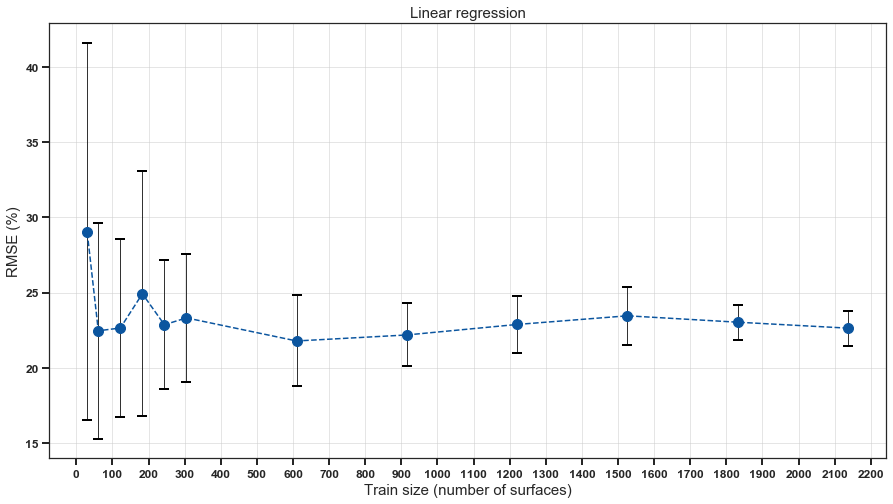

In [41]:
from pylab import figure, show, legend, ylabel
import matplotlib.ticker as ticker
# create the general figure
fig1 = figure(figsize=(15,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)

ax1.errorbar(df_reg1['Train_size'],df_reg1['mean_Final_RMSE'], yerr=df_reg1['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10)
#ax1.legend(['neural network RMSE'],loc=2)
ylabel('RMSE (%)',fontsize=15)
plt.xlabel('Train size (number of surfaces)',fontsize=15,)
# now, the second axes that shares the x-axis with the ax1
tick_spacing = 100
#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
#ax1.errorbar(df_new5['Train_size'] ,df_new5 ['mean_Final_RMSE'], yerr=df_new5 ['std_final_rmse'],ecolor='black',fmt='xr-',label='linear regression RMSE',capthick=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
plt.title('Linear regression',fontsize=15)
#legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.grid(True)
ax1.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=12)
show()

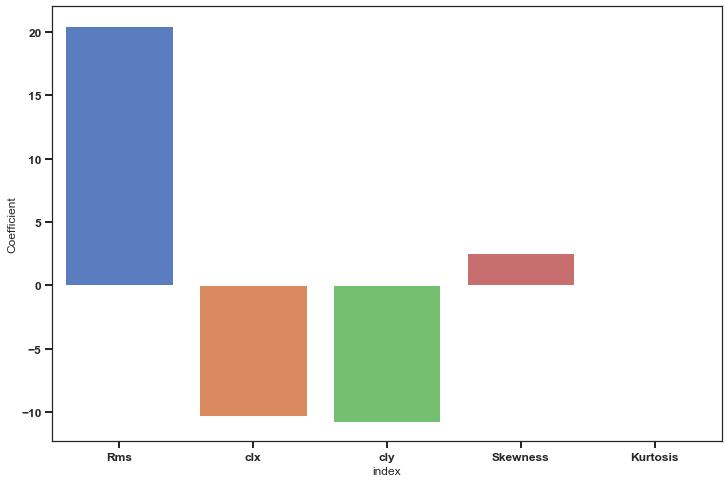

In [42]:

#xlabels = boston.feature_names[which_betas]
#stats.summary(regr,X_train, y_train, xlabels)
coeff_df = pd.DataFrame(regr.coef_,X_train.columns,columns=['Coefficient'])
coeff_df


plt.figure(figsize=(12,8))
sns.barplot('index', y='Coefficient', data=coeff_df.reset_index(),palette = 'muted')
plt.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=12)


In [43]:
from sklearn.ensemble import RandomForestRegressor
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in [1,5,10,20,30,40,50,60,70,80,90,92,94,96,98,99]:
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        regr = RandomForestRegressor(max_depth=14,min_samples_leaf=8,random_state=0,n_estimators=25)
        regr.fit(X_train, y_train)
        pre= regr.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_for1 = pd.DataFrame(lst2, columns=cols)
df_for1

1
5
10
20
30
40
50
60
70
80
90
92
94
96
98
99


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,1,3022,21.507723,0.012234,0.105020,0.000051,0.832063,0.018965
1,5,2900,21.504479,0.018819,0.104977,0.000105,0.822644,0.022870
2,10,2747,21.514110,0.018920,0.105026,0.000123,0.810037,0.028766
3,20,2442,21.516443,0.029861,0.105023,0.000146,0.774875,0.051469
4,30,2137,21.510850,0.038929,0.104972,0.000208,0.762770,0.045979
5,40,1831,21.499095,0.045334,0.104902,0.000229,0.702842,0.071911
6,50,1526,21.471924,0.044180,0.104692,0.000265,0.680887,0.075994
7,60,1221,21.445353,0.110594,0.104557,0.000455,0.616306,0.070155
8,70,915,21.458652,0.084568,0.104593,0.000324,0.564102,0.070474
9,80,610,21.317738,0.137132,0.103678,0.000725,0.518455,0.088910


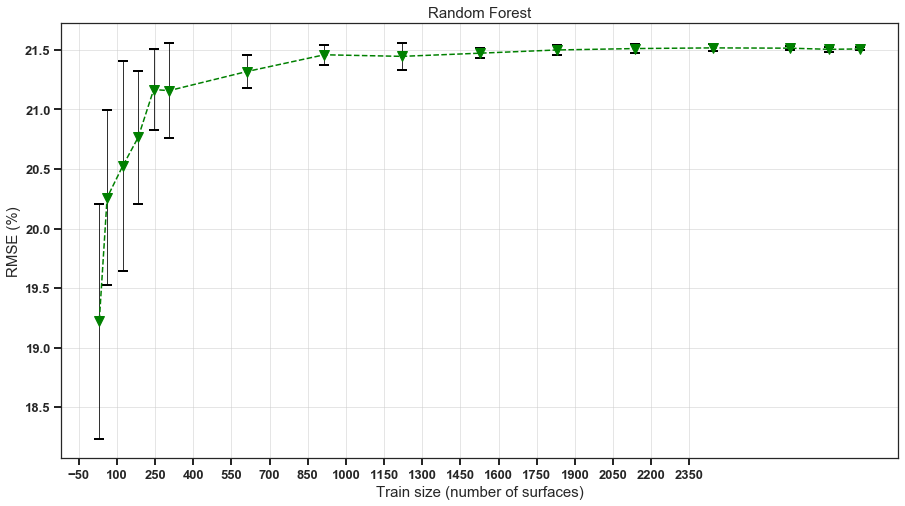

In [44]:
from pylab import figure, show, legend, ylabel
import matplotlib.ticker as ticker


# create the general figure
fig1 = figure(figsize=(15,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
line1 = ax1.errorbar(df_for1 ['Train_size'],df_for1 ['mean_Final_RMSE'], yerr=df_for1 ['std_final_rmse'],ecolor='black',fmt='--v',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='green')
#ax1.legend(['mean_RMSE_percentage'],loc=2)
#ax1.legend_.remove()
# now, the second axes that shares the x-axis with the ax1
#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
#line2 = ax2.errorbar(df_new5 ['Train_size'],df_new5 ['mean_relative_absolute_error'], yerr=df_new5 ['std_mean_relative_absolute_error'],ecolor='black',fmt='xr-',capthick=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax2.legend(["mean_rel_absolute_error"],loc=1)
#ylabel('mean_rel_absolute_error')
ylabel('RMSE (%)',fontsize=15)
plt.xlabel('Train size (number of surfaces)',fontsize=15)
# now, the second axes that shares the x-axis with the ax1
#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
#ax1.errorbar(df_new5['Train_size'] ,df_new5 ['mean_Final_RMSE'], yerr=df_new5 ['std_final_rmse'],ecolor='black',fmt='xr-',label='linear regression RMSE',capthick=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
plt.title('Random Forest',fontsize=15)


plt.grid(True)
ax1.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=13)

plt.xticks(np.arange(-50, 2400, 150))
show()

In [45]:
from sklearn.ensemble import RandomForestRegressor
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in [1]:
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        regr = RandomForestRegressor(max_depth=14,min_samples_leaf=8,random_state=0,n_estimators=25)
        regr.fit(X_train, y_train)
        pre= regr.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_for1 = pd.DataFrame(lst2, columns=cols)
df_for1

1


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,1,3022,21.510726,0.013368,0.105021,0.000083,0.836835,0.018385


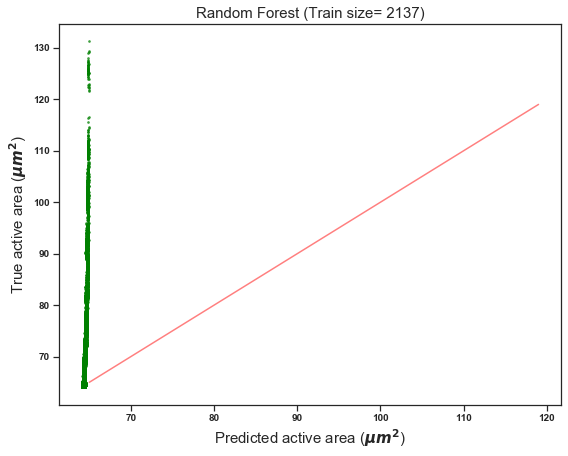

In [46]:
plt.figure(figsize=(9,7))
plt.scatter(pre,y1_held,alpha=0.6,s=3,color='green')
x = np.arange(65, 120)
plt.plot(x,x,'r',alpha=0.5)
plt.ylabel('True active area ($μm^2$)',fontsize=15)
plt.xlabel('Predicted active area ($μm^2$)',fontsize=15)
plt.title('Random Forest (Train size= 2137)',fontsize=15)
plt.show()

In [47]:
from sklearn.ensemble import RandomForestRegressor
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in range(90,100,1):
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        regr = RandomForestRegressor(max_depth=9,min_samples_leaf=3,random_state=0)
        regr.fit(X_train, y_train)
        pre= regr.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_for2 = pd.DataFrame(lst2, columns=cols)
df_for2

90
91
92
93
94
95
96
97
98
99


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,90,305,21.197892,0.232493,0.103035,0.001106,0.538890,0.059390
1,91,274,20.949249,0.453734,0.101765,0.002347,0.526388,0.065004
2,92,244,21.065452,0.237249,0.102194,0.001332,0.534546,0.062047
3,93,213,20.918932,0.420238,0.101503,0.002228,0.516190,0.050216
4,94,183,20.985043,0.344717,0.101638,0.002076,0.520655,0.078969
5,95,152,20.459375,0.845380,0.098997,0.004087,0.498916,0.048755
6,96,122,20.203743,0.713129,0.097559,0.003633,0.473746,0.068234
7,97,91,19.765415,1.194198,0.095831,0.003842,0.458088,0.056148
8,98,61,19.418647,1.358161,0.094176,0.005241,0.443938,0.055194
9,99,30,18.635926,1.680188,0.091714,0.004304,0.367114,0.083600


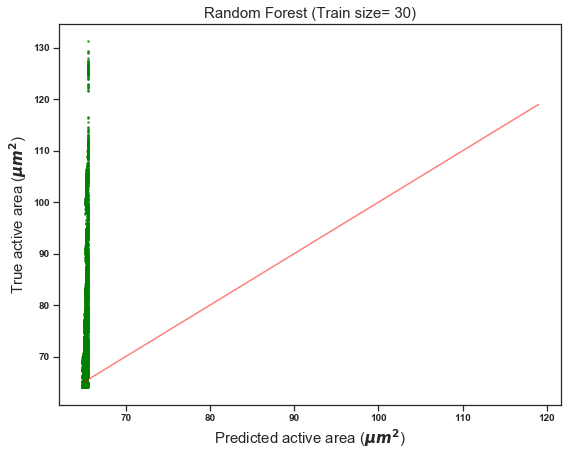

In [48]:
plt.figure(figsize=(9,7))
plt.scatter(pre,y1_held,alpha=0.6,s=3,color='green')
x = np.arange(65, 120)
plt.plot(x,x,'r',alpha=0.5)
plt.ylabel('True active area ($μm^2$)',fontsize=15)
plt.xlabel('Predicted active area ($μm^2$)',fontsize=15)
plt.title('Random Forest (Train size= 30)',fontsize=15)
plt.show()

In [49]:
# more complicated neural net!
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in [30,40,50,60,70,80,90,92,94,96,98,99]:
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        mlpred=MLPRegressor(random_state=25,hidden_layer_sizes=(15,25,40,25,15),batch_size=20,activation='relu')
        mlpred.fit(X_train, y_train)
        pre= mlpred.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_net3 = pd.DataFrame(lst2, columns=cols)
df_net3

30
40
50
60
70
80
90
92
94
96
98
99


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,30,2137,28.600444,4.868825,0.204973,0.043838,-0.004738,0.019961
1,40,1831,27.349112,3.868434,0.194240,0.035546,-0.007990,0.015255
2,50,1526,29.072647,4.413155,0.212045,0.038179,-0.012475,0.017514
3,60,1221,30.549334,4.964992,0.222854,0.044590,-0.004116,0.018599
4,70,915,34.554766,3.941583,0.257358,0.031988,-0.008285,0.020037
5,80,610,38.422827,8.337313,0.288946,0.067232,-0.015488,0.015040
6,90,305,48.704130,10.299359,0.371528,0.080688,-0.013892,0.015135
7,92,244,49.794452,7.021619,0.383783,0.056227,-0.020603,0.012163
8,94,183,50.201574,7.380238,0.389830,0.060772,-0.027352,0.004259
9,96,122,61.457674,8.181936,0.484917,0.067074,-0.025098,0.005639


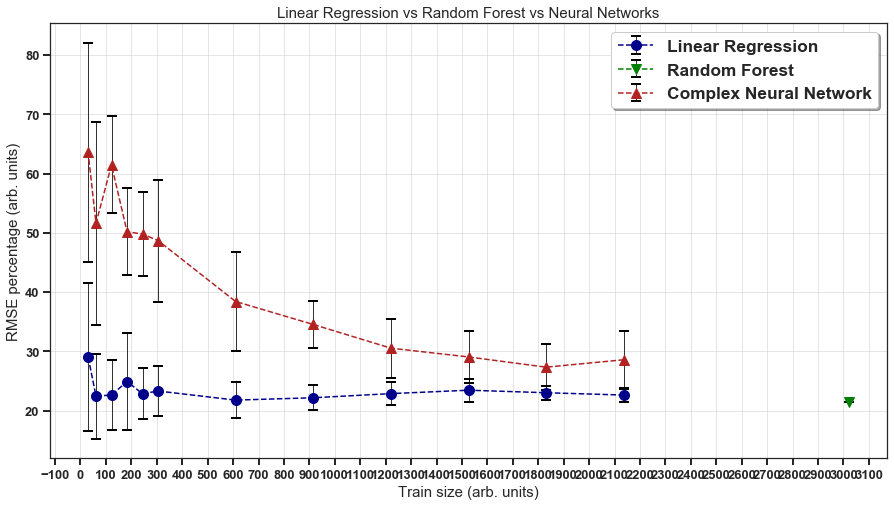

In [50]:
from pylab import figure, show, legend, ylabel
import matplotlib.ticker as ticker
# create the general figure
fig1 = figure(figsize=(15,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)

ax1.errorbar(df_reg1['Train_size'],df_reg1['mean_Final_RMSE'], yerr=df_reg1['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='darkblue',label='Linear Regression')
#ax1.legend(['neural network RMSE'],loc=2)

# now, the second axes that shares the x-axis with the ax1

#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax1.errorbar(df_for1 ['Train_size'],df_for1 ['mean_Final_RMSE'], yerr=df_for1 ['std_final_rmse'],ecolor='black',fmt='--v',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='green',label='Random Forest')
#ax1.errorbar(df_net1['Train_size'],df_net1['mean_Final_RMSE'], yerr=df_net1['std_final_rmse'],ecolor='black',fmt='--D',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='red',label='Simple Neural Network')
ax1.errorbar(df_net3['Train_size'],df_net3['mean_Final_RMSE'], yerr=df_net3['std_final_rmse'],ecolor='black',fmt='--^',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='firebrick',label='Complex Neural Network')
#ax1.legend(['neural network RMSE'],loc=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
ylabel('RMSE percentage (arb. units)',fontsize=15)
plt.xlabel('Train size (arb. units)',fontsize=15)
plt.title('Linear Regression vs Random Forest vs Neural Networks',fontsize=15)

plt.grid(True)
ax1.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=13)

legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')
ax1.tick_spacing = 100

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#ax1.set_yscale("log", nonposy='clip')
plt.grid(True) 
show()